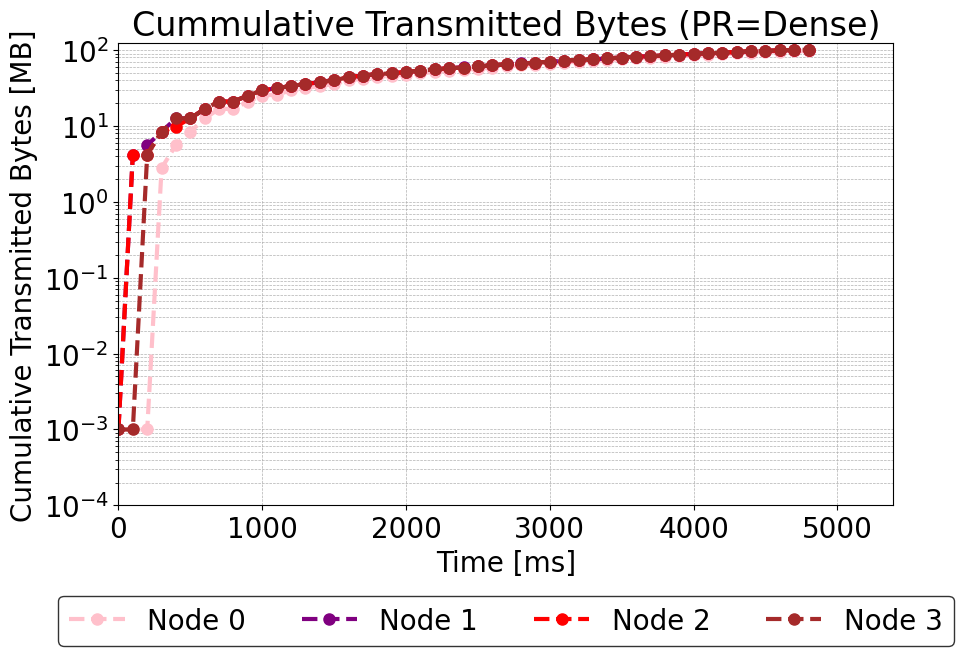

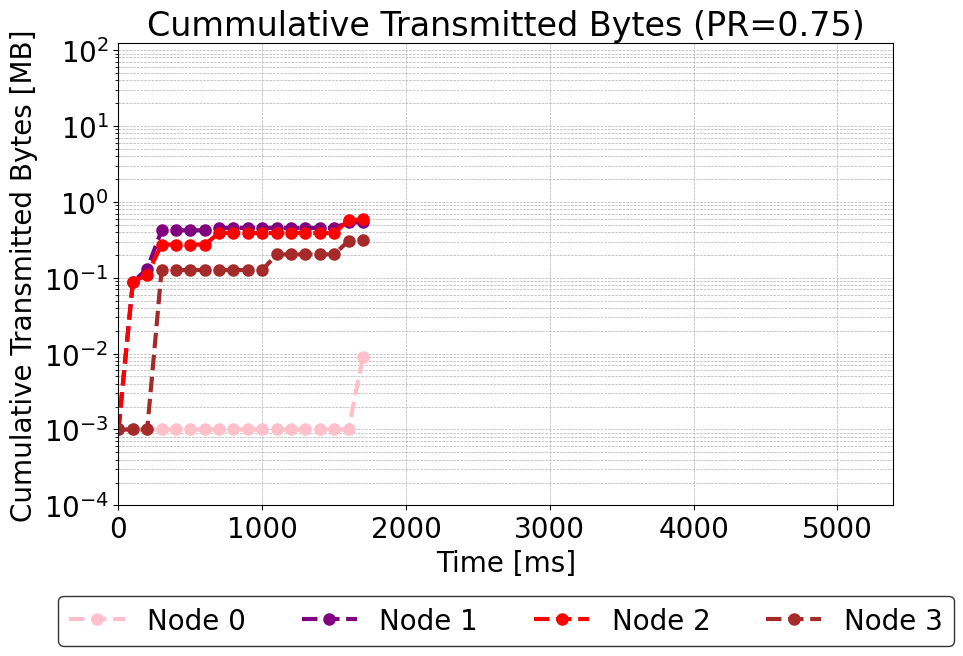

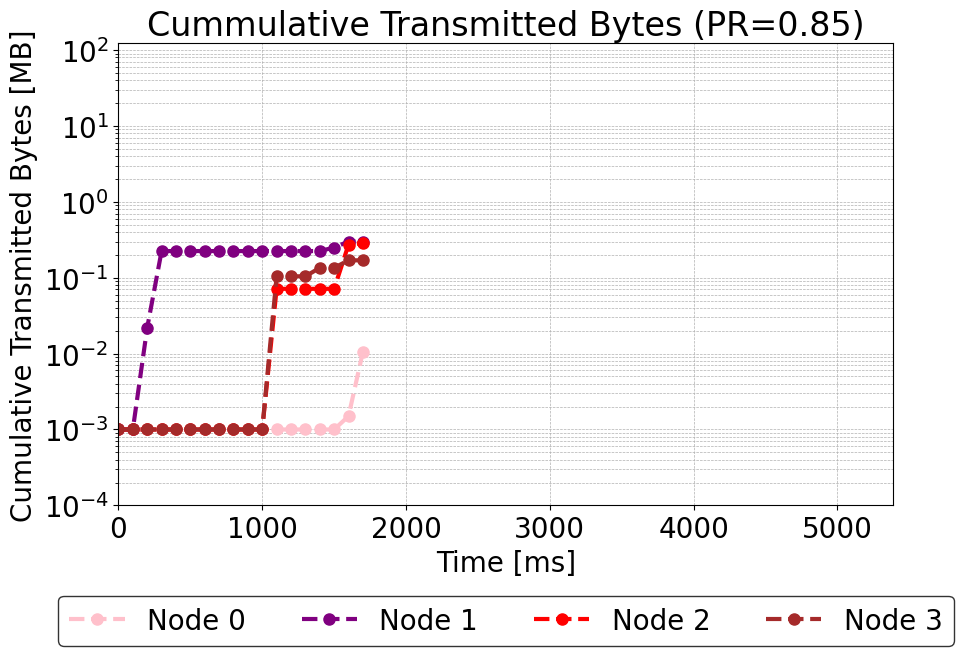

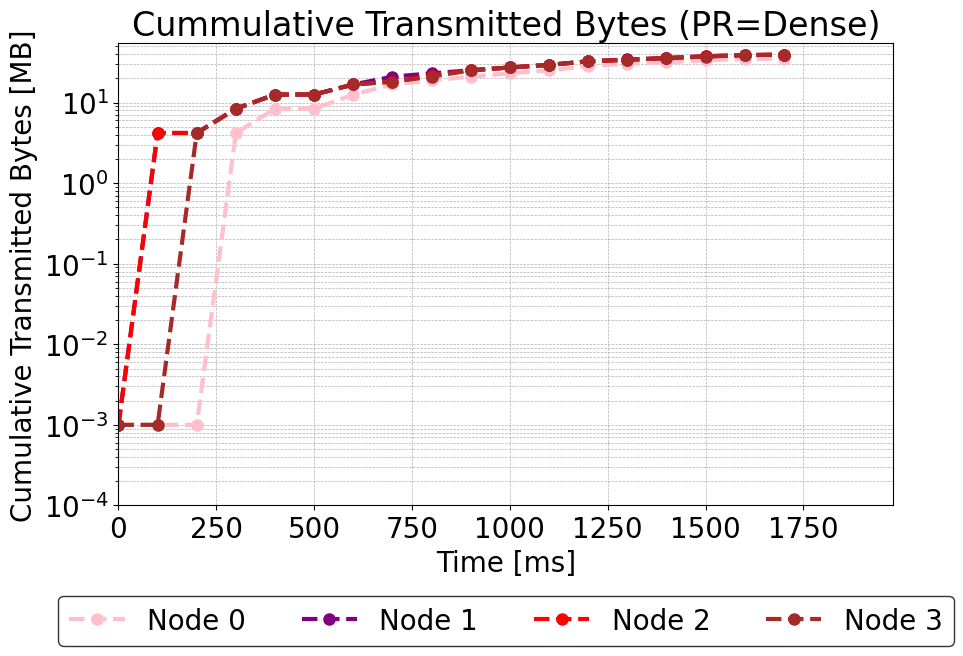

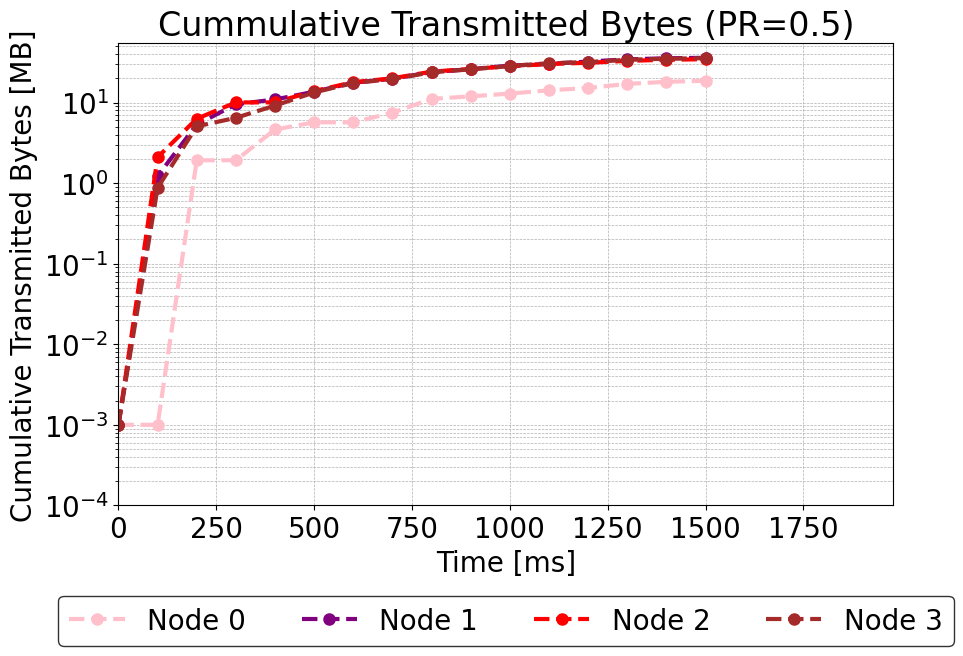

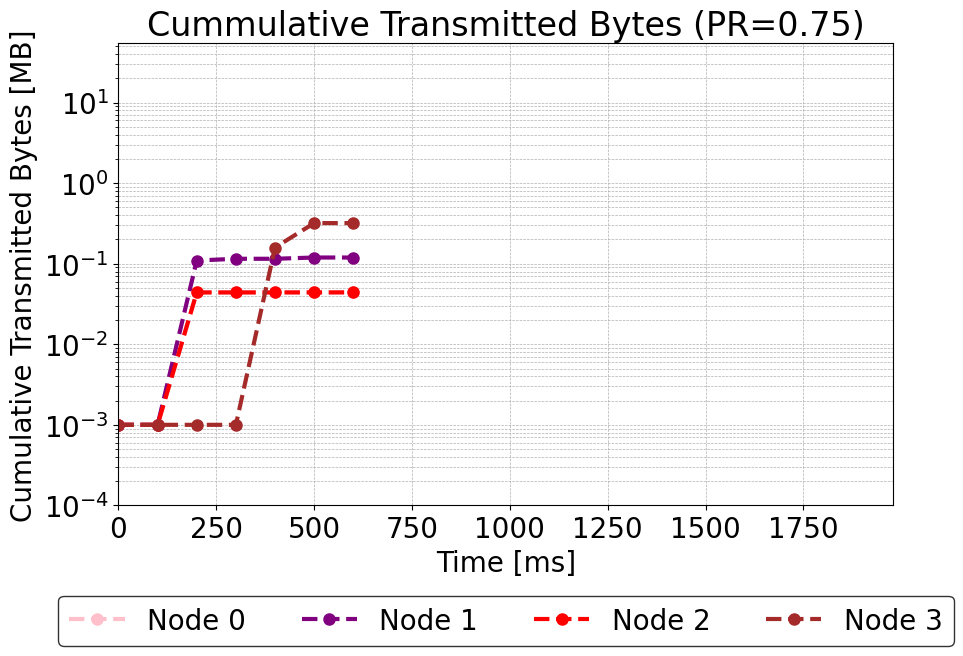

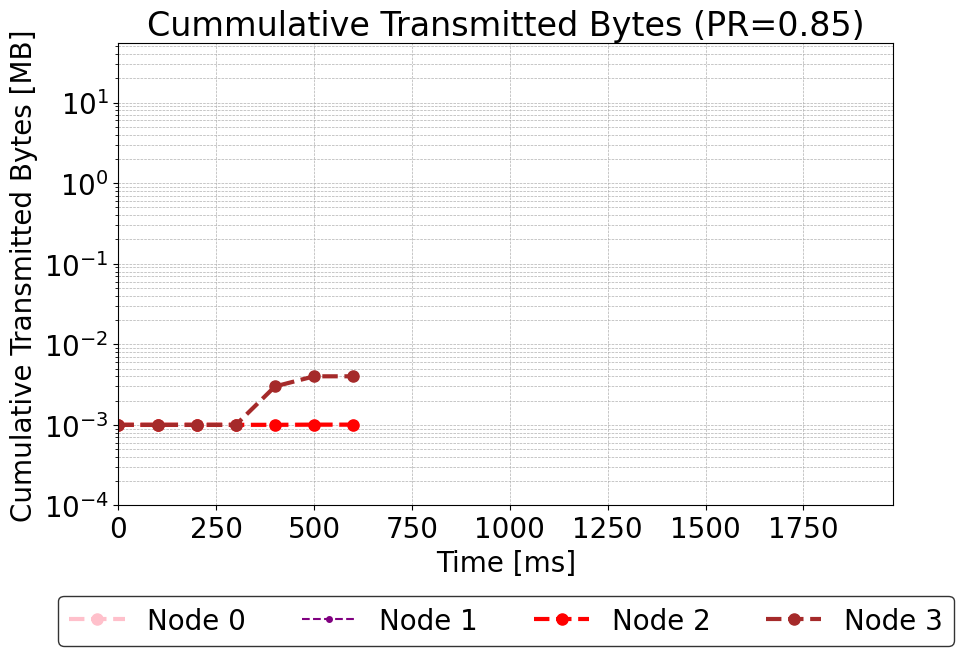

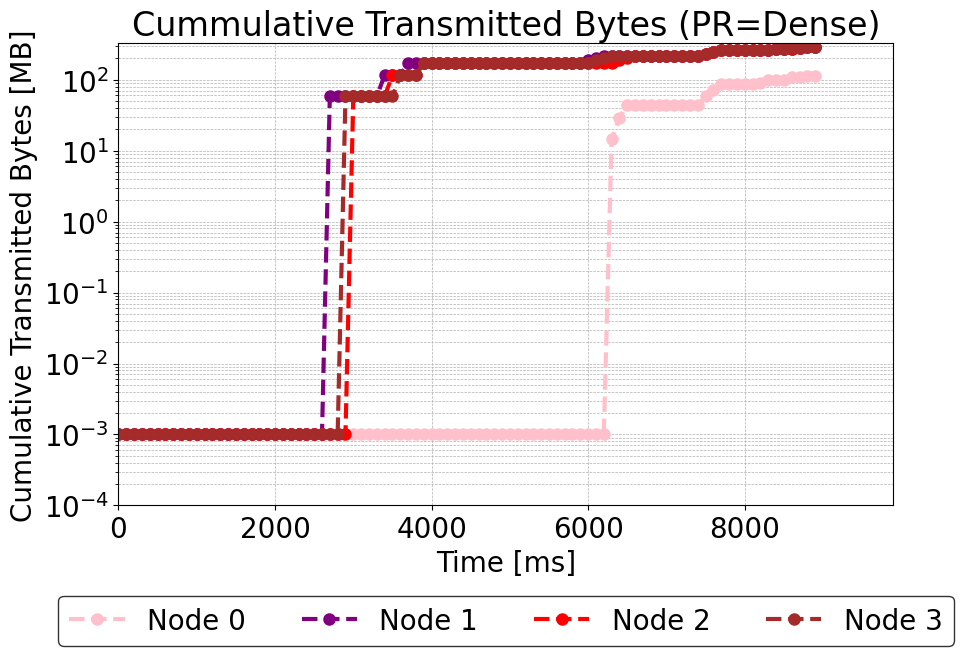

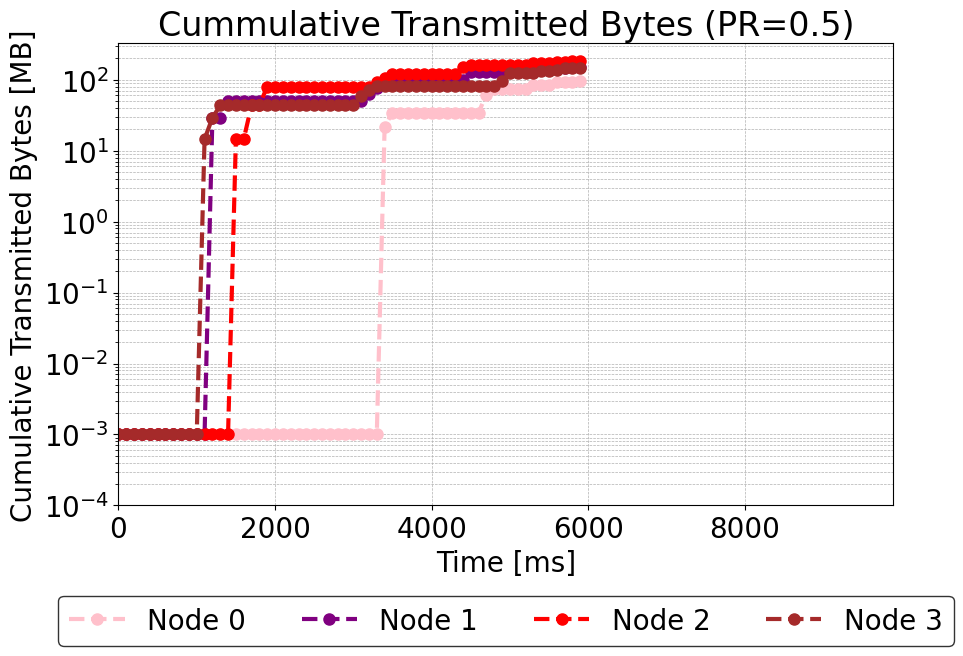

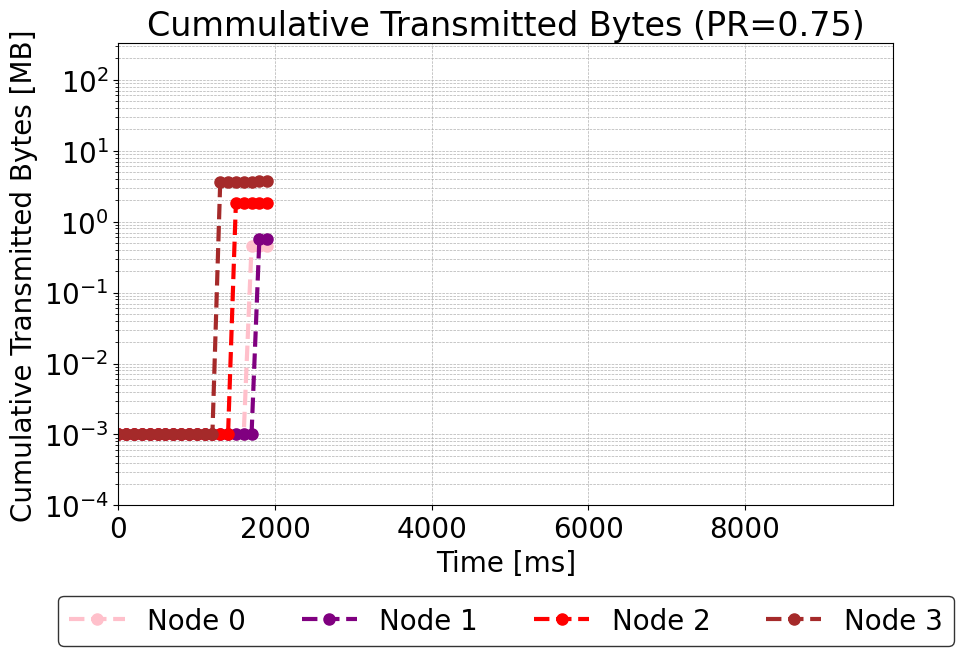

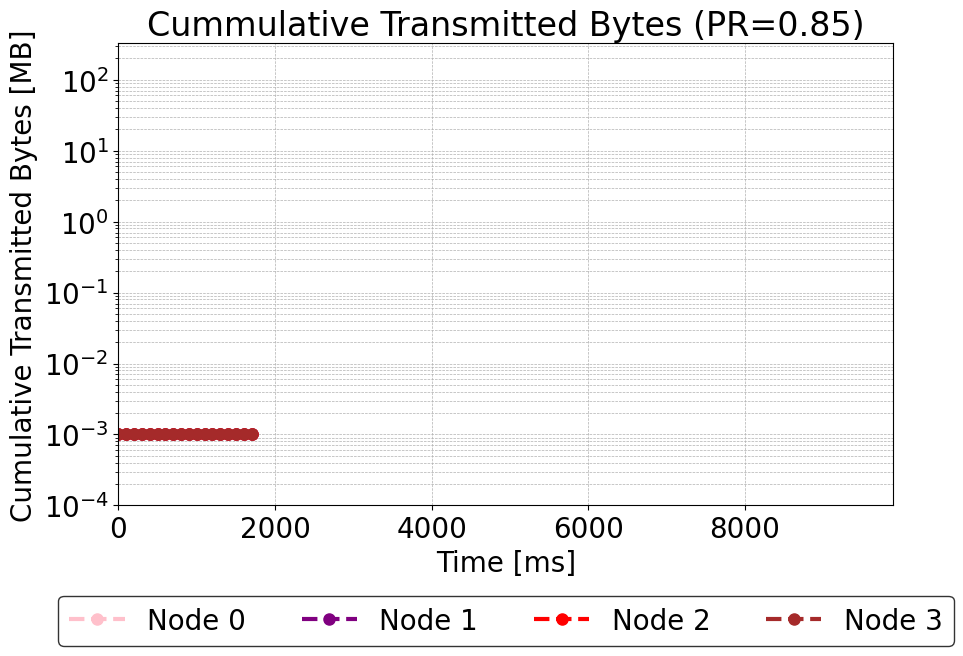

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assuming 'block_event_df' is your DataFrame with columns: 'time', 'bytes_tx', 'node', 'type'

# file lists
res101_runs = ['cifar100-resnet101-run3','',
  'cifar100-resnet101-kernel-np4-pr0.75-lcm1e-05-run1', 
  'cifar100-resnet101-kernel-np4-pr0.85-lcm1e-05-run1']
res18_runs = ['cifar10-resnet18-run2',
 'cifar10-resnet18-kernel-np4-pr0.5-lcm0.0001-run1',
  'cifar10-resnet18-kernel-np4-pr0.75-lcm0.0001-run2', 
  'cifar10-resnet18-kernel-np4-pr0.85-lcm0.0001-run3']
esc_runs = ['esc-EscFusion-run1', 
    'esc-EscFusion-kernel-np4-pr0.5-lcm1000-run2', 
    'esc-EscFusion-kernel-np4-pr0.75-lcm1000-run1', 
    'esc-EscFusion-kernel-np4-pr0.85-lcm1000-run1']

all_runs = res101_runs + res18_runs + esc_runs

arch_type_list = ['ResNet-101', 'ResNet-18', 'ESCNet']
prune_ratio_list = ['Dense', '0.5', '0.75', '0.85']
max_time_list = [4900, 1800, 9000]
max_bytes_list = [101281328.0 + 1e7, 39346572.0 + 1e7, 285839728.0 + 1e7]

num_archs = 3
num_pr = 4

save_dir = '../paper-logs'

for iarch in range(num_archs):

    # update architecture parameters 
    max_time_runs = max_time_list[iarch]
    dense_max_bytes = max_bytes_list[iarch]  # Replace with your actual maximum bytes if different

    for iprune in range(num_pr):

        run_folder = all_runs[num_pr*iarch+iprune]

        if run_folder == '':
            continue

        # Placeholder for demonstration; replace with your actual DataFrame
        df_file = f'C:\\Users\\natet\\Desktop\\graduate school\\thesis\\CaP\\{save_dir}\\{run_folder}\\block_events.csv'
        block_event_df = pd.read_csv(df_file)  # Uncomment and modify as needed

        # Parameters
        colors = ['pink', 'purple', 'red', 'brown']
        num_nodes = block_event_df['node'].nunique()
        dt = 100  # Time step in milliseconds
        max_time = block_event_df['time'].max()
        time_steps = np.arange(0, max_time + dt, dt)

        # Increase global font size
        plt.rcParams.update({'font.size': 20})

        # Initialize the figure and axes
        fig, ax = plt.subplots(figsize=(10, 6))

        # Set y-scale to logarithmic
        ax.set_yscale('log')

        # Set labels and title
        #ax.set_title('Cumulative Transmitted Bytes Over Time')
        ax.set_xlabel('Time [ms]')
        ax.set_ylabel('Cumulative Transmitted Bytes [MB]')

        # Set limits
        ax.set_xlim(0, max_time_runs * 1.1)
        ax.set_ylim(1e-4, dense_max_bytes / 1e6 * 1.1)  # Start y-axis from a small positive value

        # Add grid lines
        ax.grid(True, which="both", ls="--", linewidth=0.5)

        # Plot data for each node
        for i in range(num_nodes):
            # Filter data for the node where 'type' is 'send' and 'bytes_tx' is not null
            df_node = block_event_df[
                (block_event_df['node'] == i) &
                (block_event_df['type'] == 'send') &
                (block_event_df['bytes_tx'].notna())
            ].sort_values('time').reset_index(drop=True)

            if not df_node.empty:
                # Interpolate cumulative bytes at each time step
                df_node['cum_bytes'] = df_node['bytes_tx'].cumsum()
                # Create an interpolation function
                from scipy.interpolate import interp1d

                # add starting bytes at 0
                time_series = pd.concat([pd.Series([0]), df_node['time']])
                cum_bytes_series = pd.concat([pd.Series([0]),df_node['cum_bytes']])

                interp_func = interp1d(
                    time_series,
                    cum_bytes_series,
                    kind='previous',
                    bounds_error=False,
                    fill_value=(0, df_node['cum_bytes'].iloc[-1])
                )

                # Evaluate cumulative bytes at each time step
                cum_bytes_time_steps = interp_func(time_steps)
                # Convert to MB and ensure values are positive
                cum_bytes_time_steps = np.maximum(cum_bytes_time_steps / 1e6, 1e-3)

                # Plot with points every few milliseconds
                ax.plot(time_steps, cum_bytes_time_steps, '--o', label=f'Node {i}', color=colors[i], markersize=8, linewidth=3)
            else:
                # If no data for the node, plot a single point at (0, 1e-3)
                ax.plot(0, 1e-3, '--o', label=f'Node {i}', color=colors[i], markersize=4)

        # Add legend with increased font size
        ax.legend(fontsize=20, title_fontsize=24,loc='center', ncol=4, bbox_to_anchor=(0.5, -0.25), edgecolor='black' )

        #plt.tight_layout()
        plt.title(f'Cummulative Transmitted Bytes (PR={prune_ratio_list[iprune]})')

        # Save the plot if needed
        DO_SAVE = True  # Set to True if you want to save the plot

        if DO_SAVE:
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            plt.savefig(os.path.join(save_dir, f'cumulative_transmitted_bytes_{arch_type_list[iarch]}_{prune_ratio_list[iprune]}.pdf'), bbox_inches='tight')
            
        plt.show()

In [14]:
# determine max bytes transmitted before you plot above 

# Assuming 'block_event_df' is your DataFrame with columns: 'time', 'bytes_tx', 'node', 'type'

# file lists
res101_runs = ['cifar100-resnet101-run3','', 
  'cifar100-resnet101-kernel-np4-pr0.75-lcm1e-05-run1', 
  'cifar100-resnet101-kernel-np4-pr0.85-lcm1e-05-run1']
res18_runs = ['cifar10-resnet18-run2',
 'cifar10-resnet18-kernel-np4-pr0.5-lcm0.0001-run1',
  'cifar10-resnet18-kernel-np4-pr0.75-lcm0.0001-run2', 
  'cifar10-resnet18-kernel-np4-pr0.85-lcm0.0001-run3']
esc_runs = ['esc-EscFusion-run1', 
    'esc-EscFusion-kernel-np4-pr0.5-lcm1000-run2', 
    'esc-EscFusion-kernel-np4-pr0.75-lcm1000-run1', 
    'esc-EscFusion-kernel-np4-pr0.85-lcm1000-run1']
    
save_dir = '../paper-logs'

all_runs = res101_runs + res18_runs + esc_runs

arch_type_list = ['ResNet-101', 'ResNet-18', 'ESCNet']
prune_ratio_list = ['Dense', '0.5', '0.75', '0.85']
max_time_list = [4400, 1220, 3600]

num_archs = 3
num_pr = 4

for iarch in range(num_archs):

    print()

    for iprune in range(num_pr):


        run_folder = all_runs[num_pr*iarch+iprune]
        max_time_runs = max_time_list[iarch]

        if len(run_folder) == 0:
            continue
        
        # Placeholder for demonstration; replace with your actual DataFrame
        df_file = f'C:\\Users\\natet\\Desktop\\graduate school\\thesis\\CaP\\{save_dir}\\{run_folder}\\block_events.csv'
        block_event_df = pd.read_csv(df_file)  # Uncomment and modify as needed

        num_nodes = block_event_df['node'].nunique()

        max_bytes = 0
        for inode in range(num_nodes):
            total_bytes = block_event_df[(block_event_df['node'] == inode) & (block_event_df['bytes_tx'].notna())]['bytes_tx'].sum()
            #print(f'Node {inode} = {total_bytes} Bytes')    

            # update max
            if max_bytes < total_bytes:
                max_bytes = total_bytes

        print(f'Max bytes for {run_folder} = {max_bytes}')


Max bytes for cifar100-resnet101-run3 = 101281328.0
Max bytes for cifar100-resnet101-kernel-np4-pr0.75-lcm1e-05-run1 = 585830.0
Max bytes for cifar100-resnet101-kernel-np4-pr0.85-lcm1e-05-run1 = 299733.0

Max bytes for cifar10-resnet18-run2 = 39346572.0
Max bytes for cifar10-resnet18-kernel-np4-pr0.5-lcm0.0001-run1 = 35981396.0
Max bytes for cifar10-resnet18-kernel-np4-pr0.75-lcm0.0001-run2 = 319068.0
Max bytes for cifar10-resnet18-kernel-np4-pr0.85-lcm0.0001-run3 = 4002.0

Max bytes for esc-EscFusion-run1 = 285839728.0
Max bytes for esc-EscFusion-kernel-np4-pr0.5-lcm1000-run2 = 181780093.0
Max bytes for esc-EscFusion-kernel-np4-pr0.75-lcm1000-run1 = 3745701.0
Max bytes for esc-EscFusion-kernel-np4-pr0.85-lcm1000-run1 = 917.0
